In [1]:
import netCDF4
import requests
import os
import numpy as np
import liegecolloquium
import matplotlib.pyplot as plt

In [2]:
datadir = "../data/"
datafile = os.path.join(datadir, "numParticipant_git.csv")

In [3]:
liegecolloquium.get_participant_file(datafile)

In [4]:
Year, Participants, Papers, Abstracts, Countries = liegecolloquium.get_clq_list(datafile)

In [5]:
Participants = np.array(Participants)
Papers = np.array(Papers)
Abstracts = np.array(Abstracts)
Countries = np.array(Countries)

In [6]:
def compute_correlation(serie1, serie2, valex=-999):
    """
    Return the correlation coefficient between the 2 time series
    """
    
    # Remove missing value
    goodval = np.where(np.logical_and(serie1!=valex, serie2!=valex))[0]
    corr = np.corrcoef(serie1[goodval], serie2[goodval])[0, 1]
    return corr, len(goodval)

In [7]:
compute_correlation(Papers, Abstracts)

(-0.20817155106208035, 15)

In [8]:
compute_correlation(Papers, Participants)

(0.031069319900699187, 34)

In [9]:
compute_correlation(Papers, Countries)

(0.032600736819297739, 35)

In [10]:
compute_correlation(Abstracts, Countries)

(0.62529012989490074, 11)

In [11]:
compute_correlation(Abstracts, Participants)

(0.80669607770001317, 11)

In [12]:
compute_correlation(Participants, Countries)

(0.84162531073911395, 38)

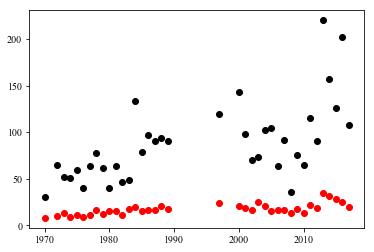

In [15]:
valex = -999
goodval = np.where(np.logical_and(Participants!=valex, Countries!=valex))[0]
plt.plot(np.array(Year)[goodval], Participants[goodval], 'ko')
plt.plot(np.array(Year)[goodval], Countries[goodval], 'ro')

plt.show()
plt.close()